# MCSE Assignment-1
### Task-2: Case Study Assignment

SRN: `PES2UG23CS368`

#### Perform data analysis on the suicides dataset and answer the following question:

- Data Preprocessing
- - Name the categorical and numerical columns in the dataset.
- - Find the number of unique values in the following columns - - country, year, sex, age, generation
- - Plot a heatmap of the missing values in the dataset.
- - Find the number of outliers in each numeric column and remove them.
- - Find the attributes with the highest correlation coefficient.

- Data Visualization
- - Plot a pie chart of the ‘suicides/100k pop’ per generation.
- - Plot a line plot of population vs suicides_no.
- - Plot a barplot of the ‘gdp_per_capita ($)’ per year.
- - Plot a distplot for the ‘suicides/100k pop’

--- 
# Data Preprocessing

In [1]:
# deps
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('suicides.csv')

In [3]:
# 1.a. Name the categorical and numerical columns in the dataset.
print("Categorical Data:")
df.describe(include=['O'])

Categorical Data:


,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Austria,male,15-24 years,Uzbekistan2014,"63,067,077,179",Generation X
freq,382,13910,4642,12,12,6408


In [4]:
# 1.a. Name the categorical and numerical columns in the dataset.
print("Numerical Data:");
df.describe()

Numerical Data:


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
# 1.b. Find the number of unique values in the following columns - country, year, sex, age, generation
unique_values = df[['country', 'year', 'sex', 'age', 'generation']].nunique()
print(unique_values)

country       101
year           32
sex             2
age             6
generation      6
dtype: int64


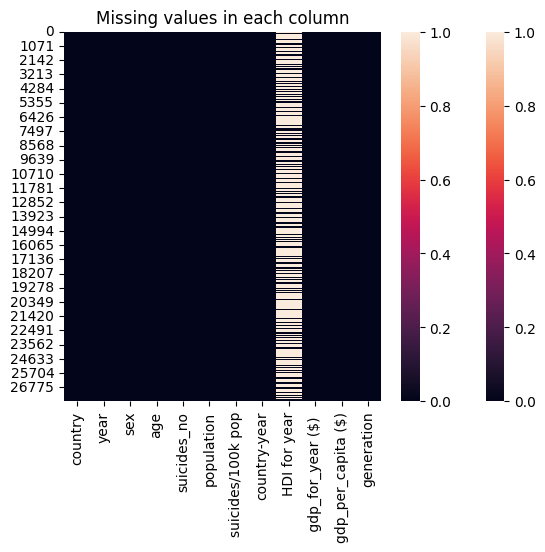

In [6]:
# 1.c. Plot a heatmap of the missing values in the dataset.
sns.heatmap(df.isnull())
plt.title("Missing values in each column")
sns.heatmap(df.isnull())
plt.show()

In [7]:
# 1.d. Find the number of outliers in each numeric column and remove them.
def find_and_remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    outliers_info = {}
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # count them
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = len(outliers)
        outliers_info[col] = num_outliers

        # rm outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df, outliers_info

cleaned_df, outliers_count = find_and_remove_outliers(df)
print("Number of outliers in each column:")
for col, count in outliers_count.items():
    print(col, ":", count)
print("\nDataFrame after removing outliers:")
print(cleaned_df)

Number of outliers in each column:
year : 0
suicides_no : 3909
population : 3077
suicides/100k pop : 1370
HDI for year : 12
gdp_per_capita ($) : 376

DataFrame after removing outliers:
          country  year     sex          age  suicides_no  population  \
72        Albania  1995    male  25-34 years           13      232900   
73        Albania  1995    male  55-74 years            9      178000   
74        Albania  1995  female    75+ years            2       40800   
75        Albania  1995  female  15-24 years           13      283500   
76        Albania  1995    male  15-24 years           11      241200   
...           ...   ...     ...          ...          ...         ...   
27806  Uzbekistan  2013  female  55-74 years           21     1356298   
27811  Uzbekistan  2014    male  55-74 years          144     1271111   
27813  Uzbekistan  2014    male    75+ years           17      224995   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27819  Uzbek

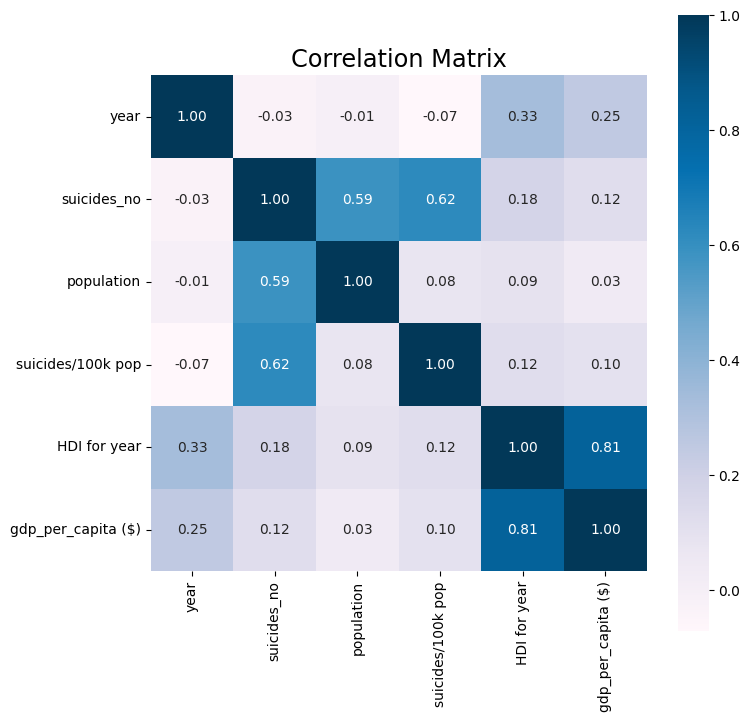

In [8]:
# 1.e. Find the attributes with the highest correlation coefficient.
dataCorr = cleaned_df.corr(numeric_only=True)
plt.figure(figsize=(8,8))
plt.title('Correlation Matrix', fontsize="xx-large")
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'PuBu')
plt.show()

In [9]:
# 1.e continued
numeric_df = cleaned_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
corr_pairs = correlation_matrix.mask(mask).stack()

if not corr_pairs.empty:
    highest_corr_pair = corr_pairs.idxmax()
    highest_corr_value = corr_pairs.max()

    print(f"The pair of attributes with the highest correlation: {highest_corr_pair}")
    print(f"Correlation coefficient: {highest_corr_value}")
else:
    print("No correlations found.")


The pair of attributes with the highest correlation: ('gdp_per_capita ($)', 'HDI for year')
Correlation coefficient: 0.8127555975524525


---

## Data Visualization

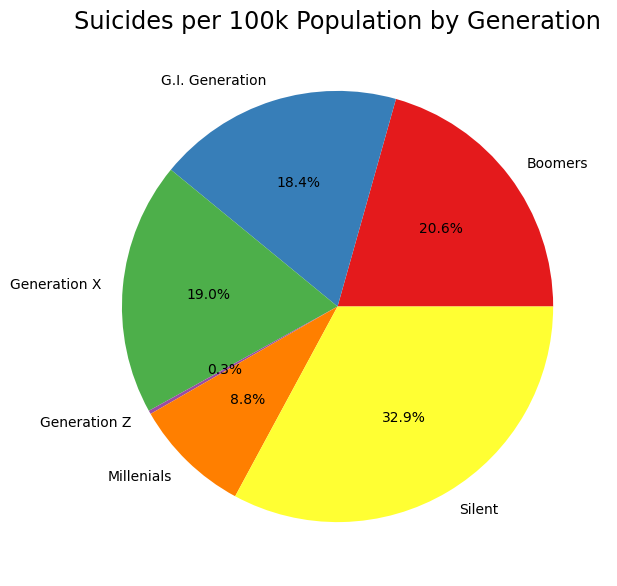

In [10]:
# 2.a. Plot a pie chart of the ‘suicides/100k pop’ per generation.
generation_data = df.groupby('generation')['suicides/100k pop'].sum()
plt.figure(figsize=(10, 7))
plt.title('Suicides per 100k Population by Generation', fontsize="xx-large")
plt.pie(generation_data, labels=generation_data.index, autopct='%1.1f%%', colors=plt.get_cmap('Set1').colors)
plt.show()

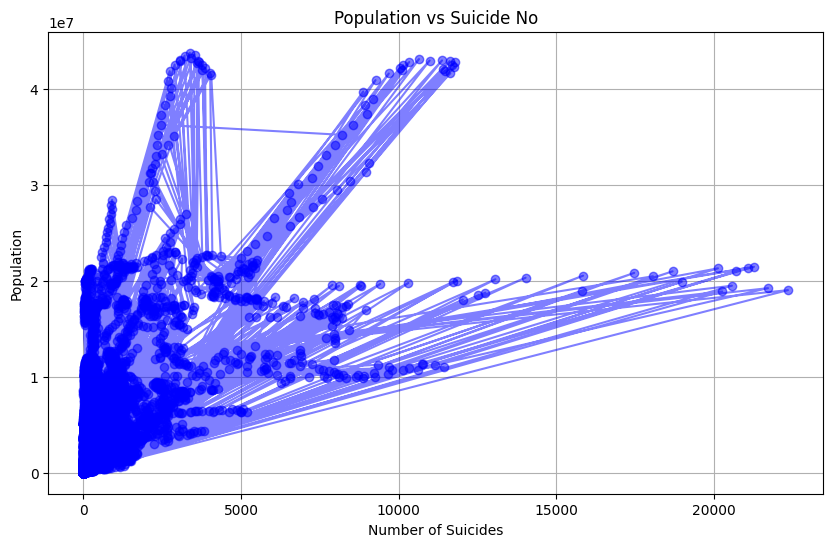

In [11]:
# 2.b. Plot a line plot of population vs suicides_no.
plt.figure(figsize=(10, 6))
plt.plot(df['suicides_no'], df['population'], marker='o', linestyle='-', color='b', alpha=0.5)

plt.xlabel('Number of Suicides')
plt.ylabel('Population')
plt.title('Population vs Suicide No')
plt.grid(True)

plt.show()

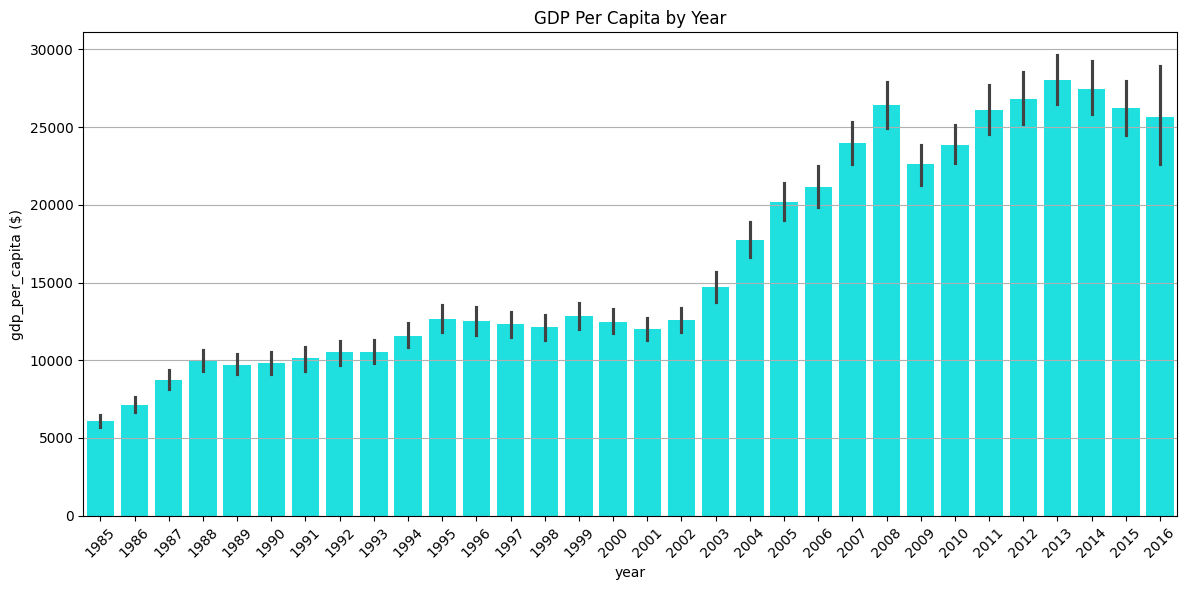

In [12]:
# 2.c. Plot a barplot of the ‘gdp_per_capita ($)’ per year
plt.figure(figsize=(12, 6))
plt.title('GDP Per Capita by Year')

sns.barplot(x='year', y='gdp_per_capita ($)', data=df, color='cyan')

plt.xticks(rotation=45)

plt.grid(axis='y')
plt.tight_layout()
plt.show()


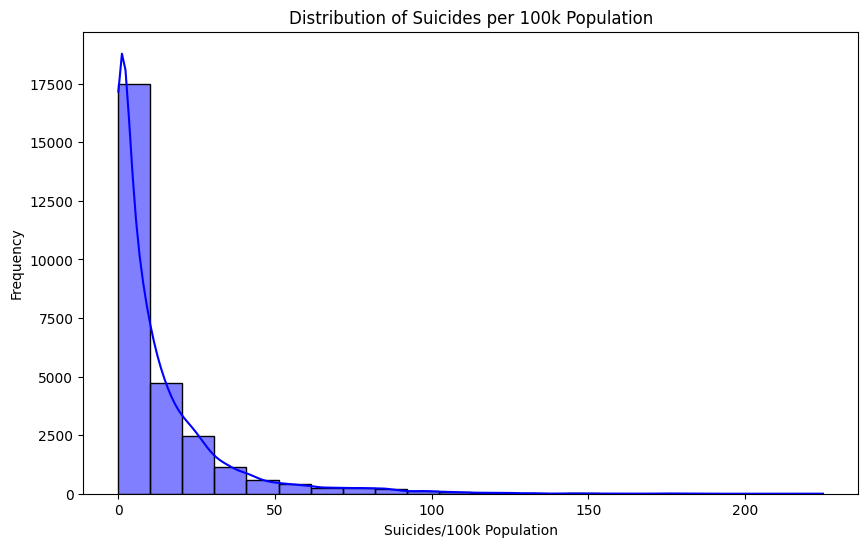

In [13]:
# 2.d. Plot a distplot for the ‘suicides/100k pop’
plt.figure(figsize=(10, 6))
sns.histplot(df['suicides/100k pop'], kde=True, color='blue', binwidth=10)  

plt.xlabel('Suicides/100k Population')
plt.ylabel('Frequency')
plt.title('Distribution of Suicides per 100k Population')

plt.show()